
#### Teoría de Circuitos II

#  Tarea Semanal 9

#### Autor: Federico Rodriguez Vizzon
<img src="./assets/ned.jpeg" align="left" width="150" /> 


# Parte 1: Diseñar dos filtros, un FIR y un IIR que cumplan con la plantilla

<img src="./assets/plantilla.svg" align="center" width="800" /> 


Cantidad de etapas de segundo orden:  23


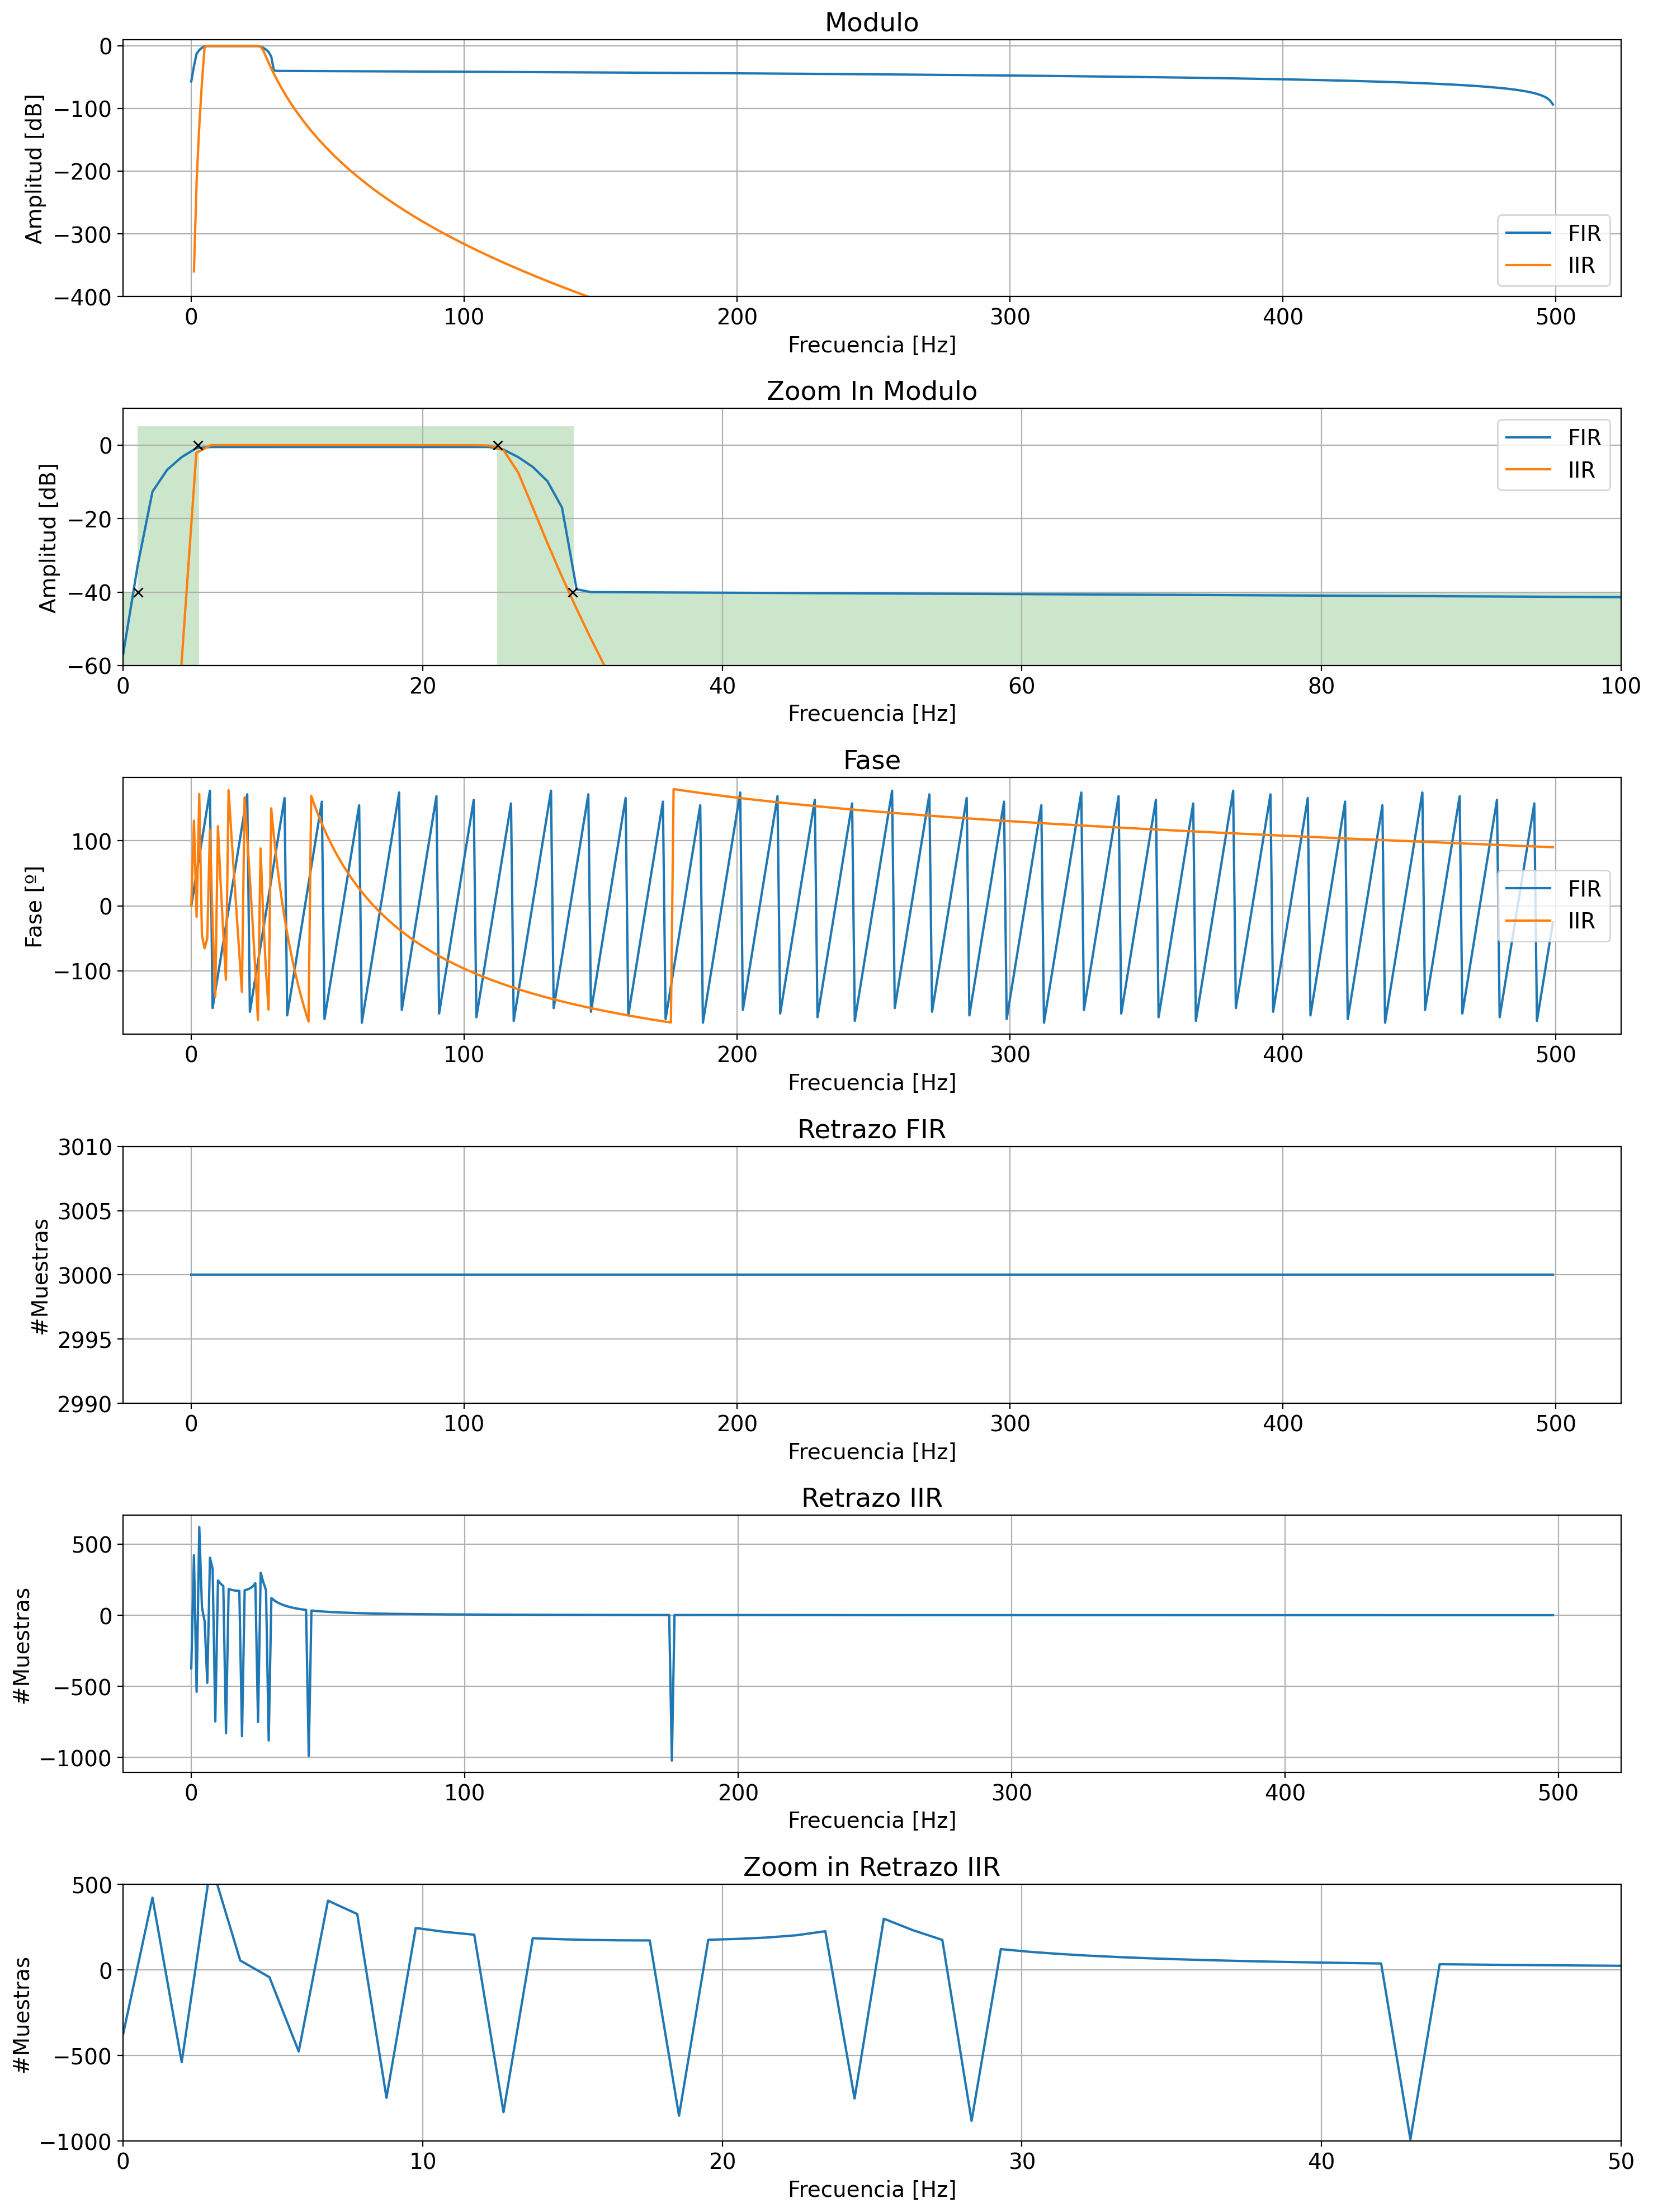

In [12]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

plt.rcParams.update({'font.size': 14})

############################## Nyquist
fs = 1000 # Hz
nyq_frec = fs / 2

############################## Plantilla
# filter design
ripple = 0.5 # dB
gpass= 0.5
atenuacion = 40 # dB
ws1 = 1.0 #Hz
wp1 = 5.0 #Hz
wp2 = 25.0 #Hz
ws2 = 30.0 #Hz

############################### Diseño del filtro ba
hz = sig.iirdesign(
    wp= [5, 25], 
    ws= [1, 30], 
    gpass=0.5,
    gstop=40, 
    analog=False, 
    ftype='butter', 
    output='sos', 
    fs=fs
)
wz_iir, hz_iir = sig.sosfreqz(hz)
print("Cantidad de etapas de segundo orden: ", len(hz))

###################### FIR por metodo de ventanas.
# FIR re-design
cant_coef = 6001
frecs = [0, ws1, wp1, wp2, ws2, nyq_frec]
gains = np.array([-np.inf, -atenuacion, -ripple, -ripple, -atenuacion, -np.inf])
gains = 10**(gains/20)
num_bh = sig.firwin2(cant_coef, frecs, gains , window='blackmanharris', fs=fs)
wz_bh, hz_bh = sig.freqz(num_bh, 1.0)

fig_fir, ax_d = plt.subplots(6, 1, figsize = (15, 20), dpi = 200)
ax_d[0].set_title('Modulo')
ax_d[0].plot(wz_bh*fs/(2*np.pi), 20*np.log10(hz_bh), label='FIR')
ax_d[0].plot(wz_iir*fs/(2*np.pi), 20*np.log10(hz_iir), label='IIR')
ax_d[0].set_ylim([-400,10])
ax_d[0].legend()
ax_d[0].set_ylabel('Amplitud [dB]')
ax_d[0].set_xlabel('Frecuencia [Hz]')
ax_d[0].grid()


ax_d[1].set_title('Zoom In Modulo')
ax_d[1].plot(wz_bh*fs/(2*np.pi), 20*np.log10(hz_bh), label='FIR')
ax_d[1].plot(wz_iir*fs/(2*np.pi), 20*np.log10(hz_iir), label='IIR')
ax_d[1].set_xlim([0,100])
ax_d[1].legend()
ax_d[1].grid()
ax_d[1].fill(
    [0,     1, 1, 30,  30, 100, 100, 25, 25, 5,   5,   0],
    [-40, -40, 5,  5, -40, -40, -60, -60, 0, 0, -60, -60],
    color=[0.8,0.902,0.8]
)
ax_d[1].plot(1,-40,5,0,25,0,30,-40, marker='x', color = 'k')
ax_d[1].set_ylabel('Amplitud [dB]')
ax_d[1].set_xlabel('Frecuencia [Hz]')
ax_d[1].set_ylim([-60,10])

ax_d[2].set_title('Fase')
ax_d[2].plot(wz_bh*fs/(2*np.pi), np.multiply(np.angle(hz_bh), (180/np.pi)), label='FIR')
ax_d[2].plot(wz_iir*fs/(2*np.pi), np.multiply(np.angle(hz_iir), (180/np.pi)), label='IIR')
ax_d[2].set_ylabel('Fase [º]')
ax_d[2].set_xlabel('Frecuencia [Hz]')
ax_d[2].legend()
ax_d[2].grid()

w_tau_fir, tau_fir = sig.group_delay((num_bh, 1), w=wz_bh, fs=fs)
tau_iir =  -np.diff(np.angle(hz_iir))/np.diff(wz_iir)
ax_d[3].set_title('Retrazo FIR')
ax_d[3].set_ylabel('#Muestras')
ax_d[3].set_xlabel('Frecuencia [Hz]')
ax_d[3].plot(w_tau_fir*fs/(2*np.pi), tau_fir)
ax_d[3].set_ylim([2990, 3010])
ax_d[3].grid()

ax_d[4].set_title('Retrazo IIR')
ax_d[4].plot((wz_iir[0:len(wz_iir)-1])*fs/(2*np.pi), tau_iir)
ax_d[4].set_ylabel('#Muestras')
ax_d[4].set_xlabel('Frecuencia [Hz]')
ax_d[4].grid()

ax_d[5].set_title('Zoom in Retrazo IIR')
ax_d[5].plot((wz_iir[0:len(wz_iir)-1])*fs/(2*np.pi), tau_iir)
ax_d[5].set_ylabel('#Muestras')
ax_d[5].set_xlabel('Frecuencia [Hz]')
ax_d[5].grid()
ax_d[5].set_ylim([-1000,500])
ax_d[5].set_xlim([0,50])


plt.tight_layout()



#ax[0].set_title('Módulos de filtros Analógico y Digital')
# Modulo de la respuesta analogica de un butt orden 2
#ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
#ax[0].semilogx(wz_calc*fs_1/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
#ax[0].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')

#ax[0].legend()
#ax[0].grid()

#ax[1].set_title('Módulos de filtros Analógico y Digital (ZOOM en FC)')
# Modulo de la respuesta analogica de un butt orden 2
#ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
#ax[1].semilogx(wz_calc*fs_1/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
#ax[1].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
#ax[1].set_ylabel('Amplitude [dB]')
#ax[1].set_xlabel('Frequency [Hz]')
#ax[1].set_xlim([500, 1500])
#ax[1].set_ylim([-4, -2.5])
#ax[1].legend()
#ax[1].grid()

#ax[2].set_title('Fases de filtros Analógico y Digital')
#ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
#ax[2].semilogx(wz_calc*fs_1/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
#ax[2].semilogx(wz*fs_1/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
#ax[2].set_ylabel('Phase [rad]')
#ax[2].set_xlabel('Frequency [Hz]')
#ax[2].legend()
#ax[2].grid()



## Conclusiones

Se diseño un filtro para el mismo objetivo por dos metodos diferentes, por un lado un IIR y por otro un FIR.

Si solo analizamos el modulo ambos filtros cumplen con la plantilla de diseño solicitada y el IIR tiene una pendiente mucho mas abrupta en la banda de transicion de $1Hz$ a $5Hz$. Pero si analizamos la fase podemos observar que el IIR tiene un comportamiento muy erratico en la banda de paso lo que tiene como consecuencia que el retraso del sistema no sea constante, por otra parte el FIR no presenta estas anomalias en la banda de paso y al calcular el retrazo podemos ver que el mismo es constante en la banda de paso, caracteristica deseable en los filtros digitales.

Uno de los problemas del FIR es que debemos subir mucho el orden para cumplir con $\omega_{s2}$ pero si relajamos esta restriccion con bastante menos coeficientes podemos obtener un filtro que se acerca a lo solicitado (2001 vs 6001).

Una ventaja que no debemos olvidar del FIR es que nos garantiza estabilidad.

# Parte 2: Utilizacion del los filtros.

In [13]:
mat_struct = sio.loadmat('ecg.mat')
ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)
cant_muestras

1129116

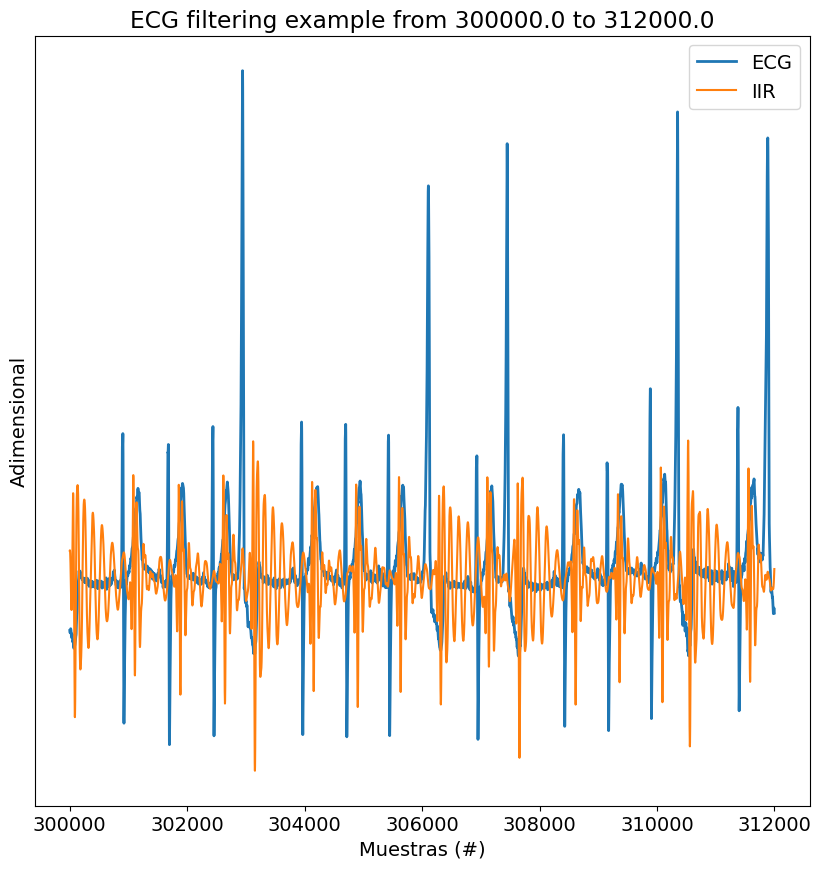

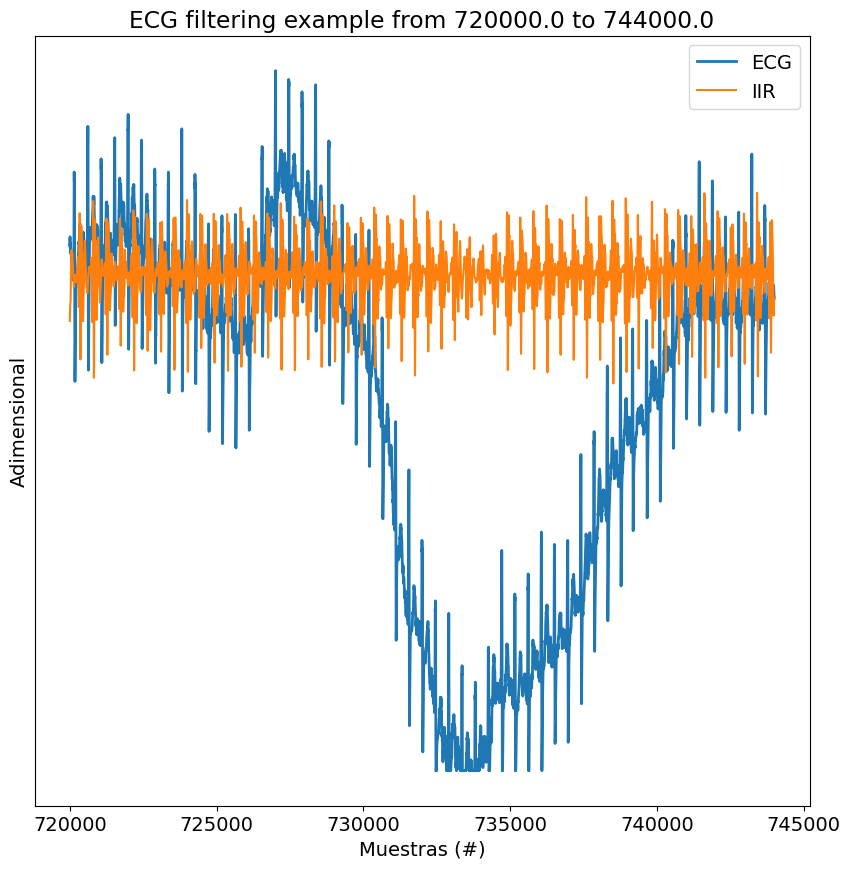

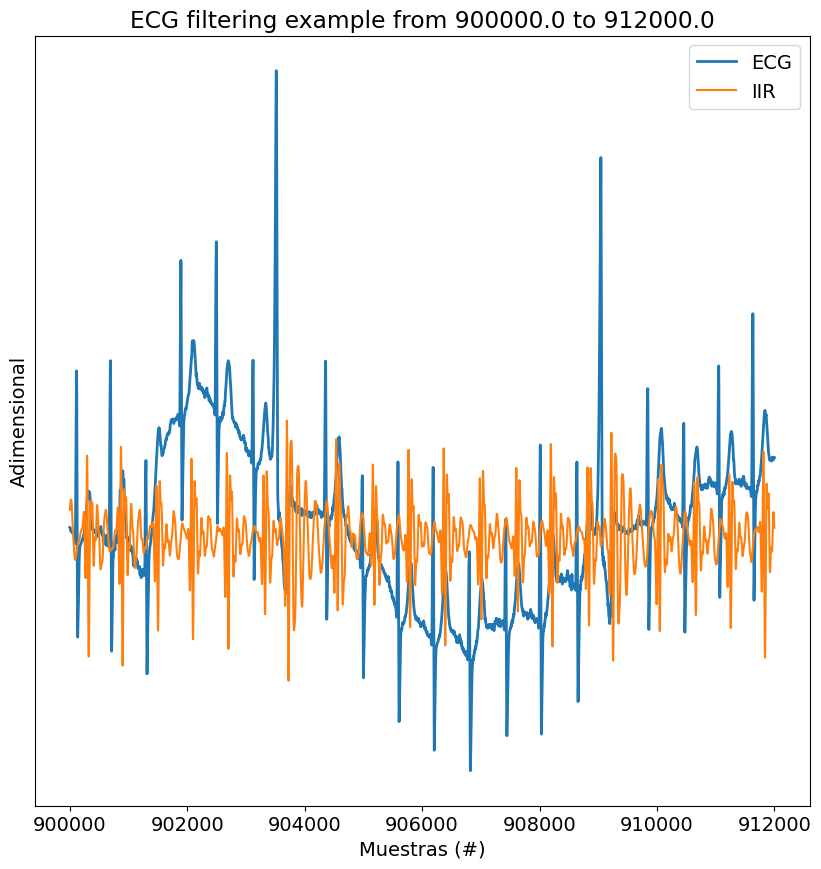

In [15]:
filtrado_iir = sig.sosfilt(hz, ecg_one_lead)


# Segmentos de interés con ALTA contaminación
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, filtrado_iir[zoom_region], label='IIR')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

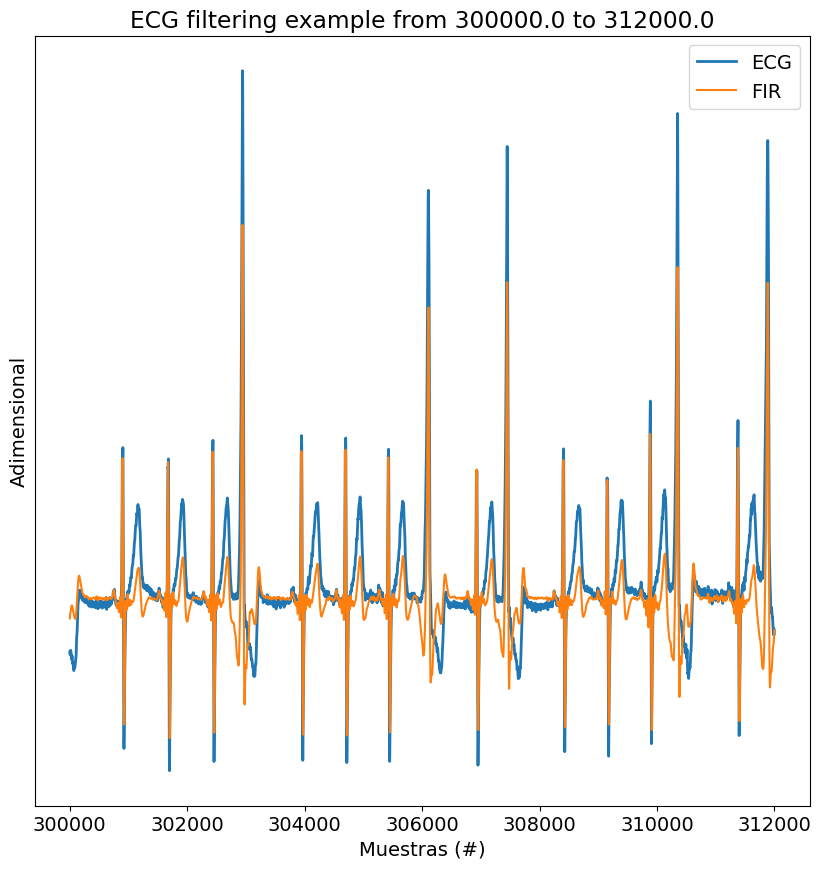

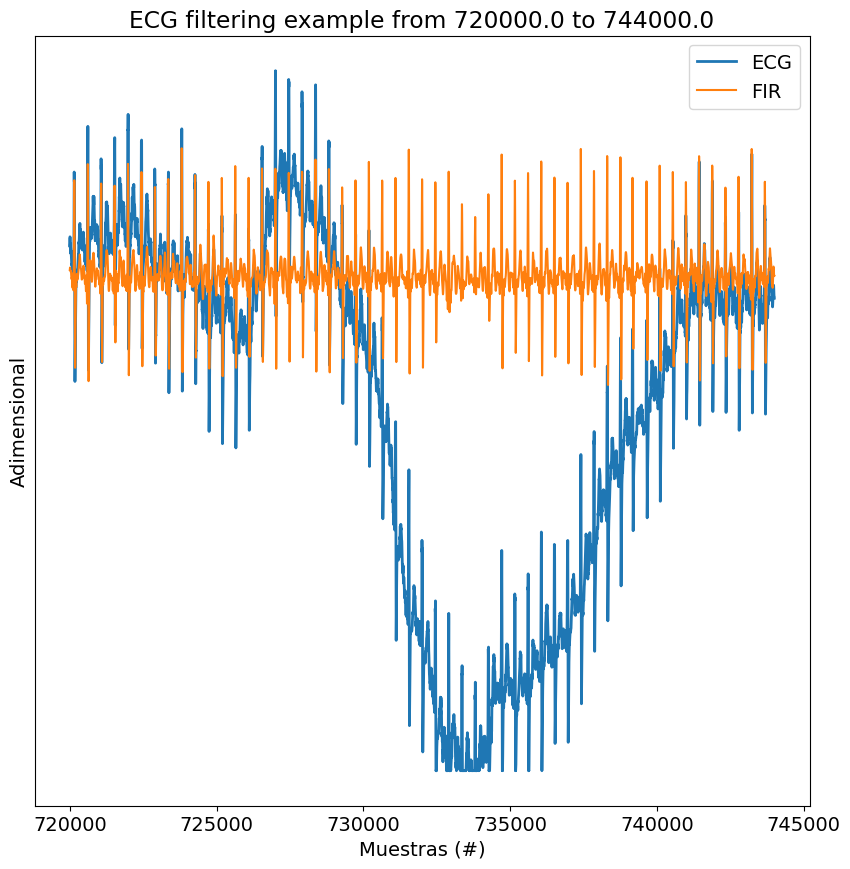

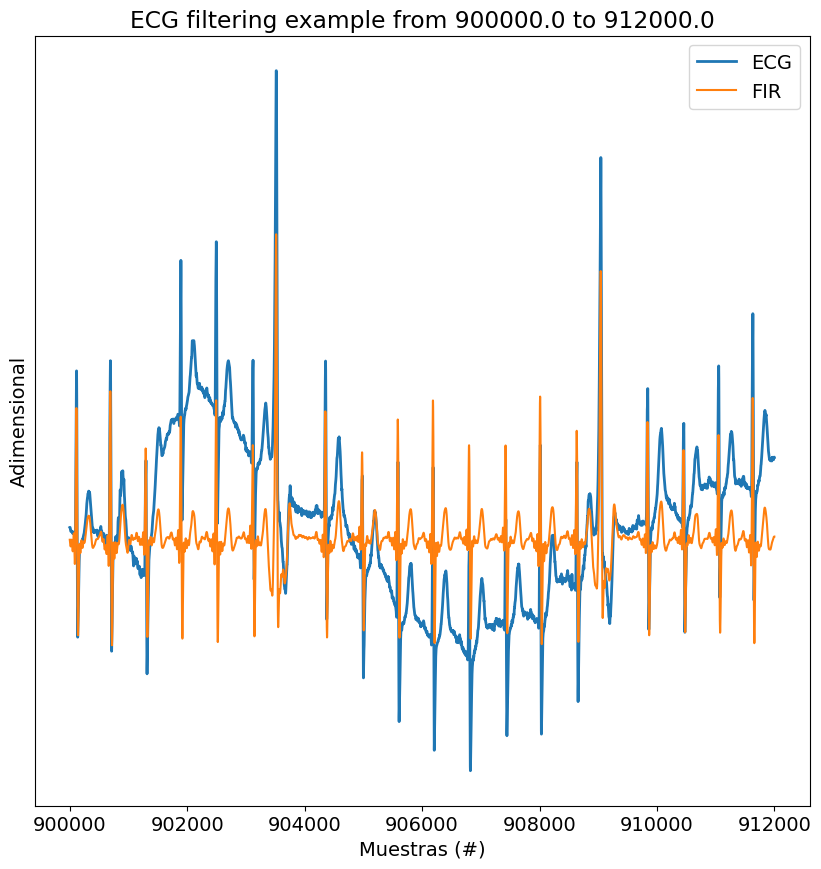

In [16]:
filtrado_fir = sig.lfilter(num_bh, 1, ecg_one_lead)

demora = 3000

# Segmentos de interés con ALTA contaminación
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, filtrado_fir[zoom_region + demora], label='FIR')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

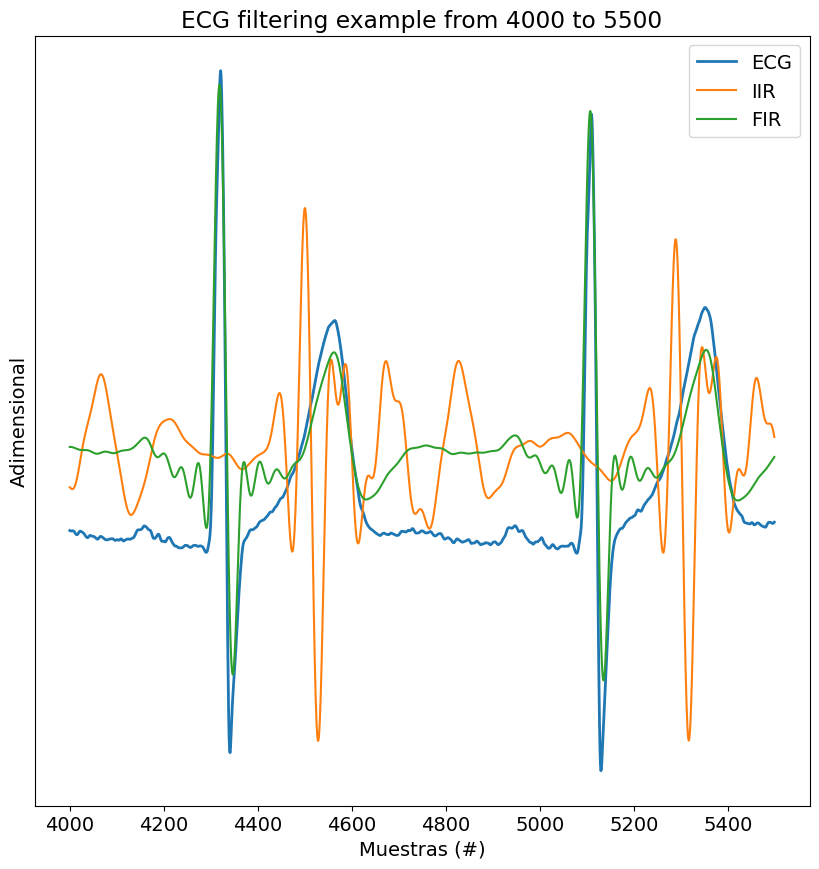

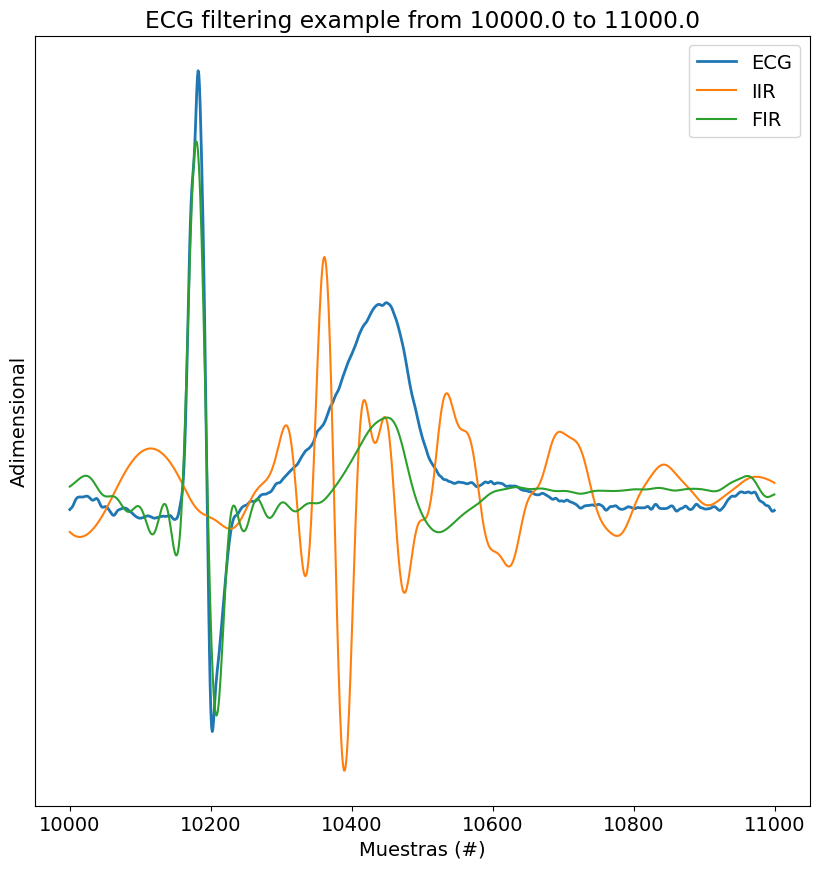

In [17]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, filtrado_iir[zoom_region], label='IIR')
    plt.plot(zoom_region, filtrado_fir[zoom_region + demora], label='FIR')
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

## Conclusiones 2:

Podemos obeservar que tanto en las zonas de baja contaminacion como en las de alta contaminacion el filtro FIR da una respuesta mas fiel a la señal que se esta estudiando, respetando la morfologia de la misma sin deformarla para que pueda ser utilizada.